In [1]:
%pip install numpy pandas matplotlib scikit-learn tensorflow openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
%pip install tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [4]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [5]:
df = pd.read_excel('Platinum_data_filtered.xlsx')
df=df.set_index(pd.DatetimeIndex(df['date'].values))

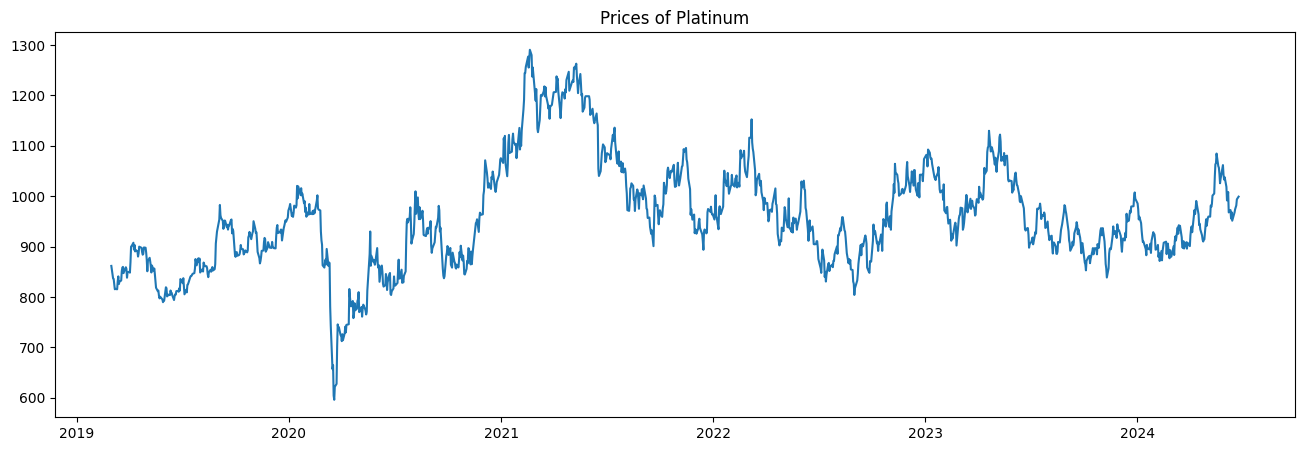

In [7]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Format column Price to float


# Flip the column
df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['date', 'close'])
df1.drop('date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['close'])
plt.title('Prices of Platinum')
plt.show()

In [13]:
# Split dataset 7-2-1

In [9]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [10]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [11]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [12]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.21753, saving model to save_model_7_2_1.keras
17/17 - 3s - 191ms/step - loss: 0.2175
Epoch 2/80

Epoch 2: loss improved from 0.21753 to 0.07686, saving model to save_model_7_2_1.keras
17/17 - 1s - 46ms/step - loss: 0.0769
Epoch 3/80

Epoch 3: loss improved from 0.07686 to 0.06318, saving model to save_model_7_2_1.keras
17/17 - 1s - 45ms/step - loss: 0.0632
Epoch 4/80

Epoch 4: loss improved from 0.06318 to 0.05733, saving model to save_model_7_2_1.keras
17/17 - 1s - 45ms/step - loss: 0.0573
Epoch 5/80

Epoch 5: loss improved from 0.05733 to 0.05388, saving model to save_model_7_2_1.keras
17/17 - 1s - 46ms/step - loss: 0.0539
Epoch 6/80

Epoch 6: loss improved from 0.05388 to 0.04987, saving model to save_model_7_2_1.keras
17/17 - 1s - 44ms/step - loss: 0.0499
Epoch 7/80

Epoch 7: loss did not improve from 0.04987
17/17 - 1s - 43ms/step - loss: 0.0510
Epoch 8/80

Epoch 8: loss improved from 0.04987 to 0.04762, saving model to save_model_7_2_1.keras


In [14]:
from keras.models import load_model

# Reshape y_train to 2D if it's 1D, as MinMaxScaler expects 2D input
y_train = y_train.reshape(-1, 1)

# Transform the y_train array back to the original scale
y_train_original = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')  # Đảm bảo đuôi đúng như đã lưu

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict_original = sc.inverse_transform(y_train_predict)

# Kiểm tra kết quả
print(f"Original y_train shape: {y_train_original.shape}")
print(f"Predicted y_train shape: {y_train_predict_original.shape}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Original y_train shape: (828, 1)
Predicted y_train shape: (828, 1)


In [15]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [16]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [17]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.4728660185535636, 0.4578954914986548, 0.42881817232948505, 0.43184111283430493, 0.4423492290082798, 0.40808985162841815, 0.41845396804980206, 0.3965740886195033, 0.4249315847423165, 0.3984453825367922, 0.42507558449490745, 0.4364473477512314, 0.4486828459482035, 0.45170578645302295, 0.4161508505913387, 0.4401900234441083, 0.44637972848974017, 0.40434717593554126, 0.4273787019533708, 0.40996114554570684, 0.40880958681647517, 0.41499929186210704, 0.43846264142111124, 0.41370373338028443, 0.4531452568291374, 0.46667622564963285, 0.4550165507464261, 0.4920109569842248, 0.47430548892967805, 0.4986324855710311, 0.4858212519385927, 0.497049103300625, 0.4643731081911695, 0.4361595239626479, 0.4335684069990027, 0.4531452568291374, 0.4321289366228882, 0.44738737532468, 0.45012231632431776, 0.43184111283430493, 0.44882684570079423, 0.4390384647148764, 0.4696991661544523, 0.4866848990209418, 0.49503380963074517, 0.4787678119523129, 0.5268461576578518, 0.5419605966070524, 0.530732657386

In [18]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5845434069633484], [0.5875849723815918], [0.5902023911476135], [0.5932157039642334], [0.5970174670219421], [0.6016870141029358], [0.6070833802223206], [0.6129592657089233], [0.619056224822998], [0.625165581703186], [0.6311554312705994], [0.6369706392288208], [0.6426166296005249], [0.6481355428695679], [0.6535834670066833], [0.6590129137039185], [0.6644628643989563], [0.6699559688568115], [0.6754996180534363], [0.681090772151947], [0.6867203712463379], [0.6923781633377075], [0.6980551481246948], [0.7037454843521118], [0.7094454169273376], [0.7151532769203186], [0.7208681106567383], [0.7265893220901489], [0.7323153018951416], [0.7380442023277283]]


In [19]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%Y-%m-%d').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [20]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1001.98230069]
 [1004.09527604]
 [1005.91359673]
 [1008.00694499]
 [1010.6480296 ]
 [1013.89196373]
 [1017.64081901]
 [1021.72279637]
 [1025.95835357]
 [1030.2025235 ]
 [1034.3636717 ]
 [1038.40349638]
 [1042.32576562]
 [1046.1597544 ]
 [1049.94442703]
 [1053.71626339]
 [1057.50234387]
 [1061.31840327]
 [1065.16957609]
 [1069.05375057]
 [1072.96463279]
 [1076.89510068]
 [1080.83890173]
 [1084.79197803]
 [1088.75172091]
 [1092.71697097]
 [1096.68706569]
 [1100.66159099]
 [1104.63942888]
 [1108.61929573]]


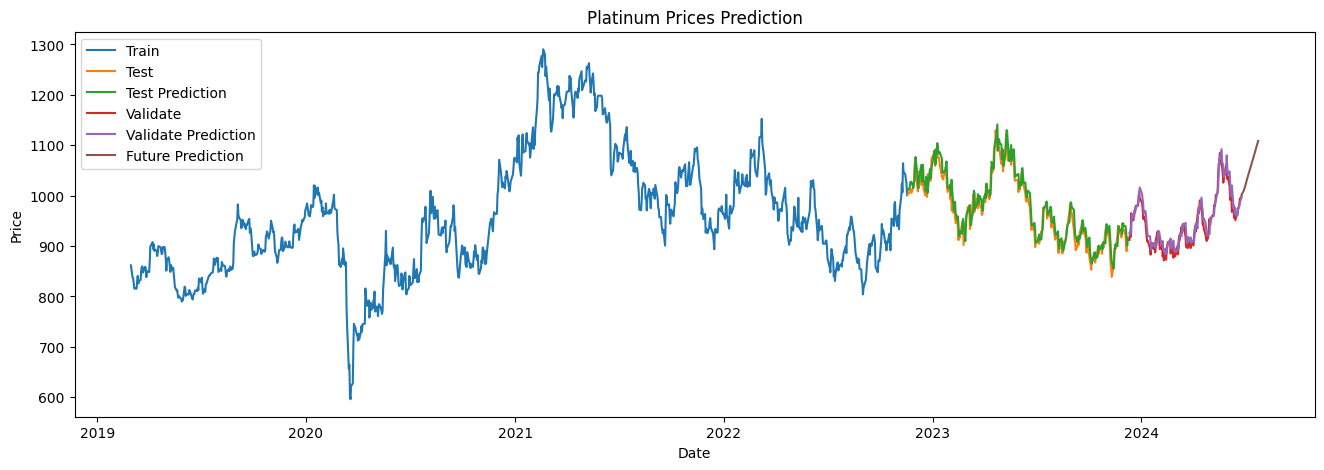

In [21]:
import matplotlib.pyplot as plt


df1 = df1.rename(columns={'close': 'Price'})

# Inverse transform lst_output
y_pred_future = sc.inverse_transform(np.array(lst_output).reshape(-1, 1))

# Create a DataFrame for future predictions
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price'])
PREDICTIONS_FUTURE['date'] = datelist_future
PREDICTIONS_FUTURE.set_index('date', inplace=True)

# Define data for plotting
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Plotting
plt.figure(figsize=(16, 5))

# Plot training data
plt.plot(train_data.index, train_data['Price'], label='Train')

# Plot test data and its prediction
plt.plot(test_data.index, test_data['Price'], label='Test')
plt.plot(test_data.index, y_test_predict, label='Test Prediction')

# Plot validation data and its prediction
plt.plot(val_data.index, val_data['Price'], label='Validate')
plt.plot(val_data.index, y_val_predict, label='Validate Prediction')

# Plot future predictions
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['price'], label='Future Prediction')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend()
plt.show()


In [22]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  15.23379574181897
MAPE:  1.5678182938687808
RMSE:  19.026607758481095

** Validate **
MAE:  13.534897078329072
MAPE:  1.4348804749779374
RMSE:  16.913932283828483


In [23]:
# Split dataset 6-3-1

In [24]:
#  Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [25]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [26]:

# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [27]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint
import numpy as np


x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  

# Build the model
model = Sequential()

# Add LSTM layers
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# Add Dense output layer
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_absolute_error', optimizer='adam')

# Set the filename to use for saving the best model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint callback to save the best model based on 'loss'
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])


Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.21247, saving model to save_model_6_3_1.keras
14/14 - 3s - 201ms/step - loss: 0.2125
Epoch 2/80

Epoch 2: loss improved from 0.21247 to 0.07797, saving model to save_model_6_3_1.keras
14/14 - 1s - 47ms/step - loss: 0.0780
Epoch 3/80

Epoch 3: loss improved from 0.07797 to 0.06280, saving model to save_model_6_3_1.keras
14/14 - 1s - 47ms/step - loss: 0.0628
Epoch 4/80

Epoch 4: loss improved from 0.06280 to 0.05677, saving model to save_model_6_3_1.keras
14/14 - 1s - 47ms/step - loss: 0.0568
Epoch 5/80

Epoch 5: loss improved from 0.05677 to 0.05517, saving model to save_model_6_3_1.keras
14/14 - 1s - 47ms/step - loss: 0.0552
Epoch 6/80

Epoch 6: loss improved from 0.05517 to 0.05457, saving model to save_model_6_3_1.keras
14/14 - 1s - 47ms/step - loss: 0.0546
Epoch 7/80

Epoch 7: loss improved from 0.05457 to 0.04991, saving model to save_model_6_3_1.keras
14/14 - 1s - 47ms/step - loss: 0.0499
Epoch 8/80

Epoch 8: loss did not improve from 0.04991


In [28]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [29]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [30]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [31]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.4728660185535636, 0.4578954914986548, 0.42881817232948505, 0.43184111283430493, 0.4423492290082798, 0.40808985162841815, 0.41845396804980206, 0.3965740886195033, 0.4249315847423165, 0.3984453825367922, 0.42507558449490745, 0.4364473477512314, 0.4486828459482035, 0.45170578645302295, 0.4161508505913387, 0.4401900234441083, 0.44637972848974017, 0.40434717593554126, 0.4273787019533708, 0.40996114554570684, 0.40880958681647517, 0.41499929186210704, 0.43846264142111124, 0.41370373338028443, 0.4531452568291374, 0.46667622564963285, 0.4550165507464261, 0.4920109569842248, 0.47430548892967805, 0.4986324855710311, 0.4858212519385927, 0.497049103300625, 0.4643731081911695, 0.4361595239626479, 0.4335684069990027, 0.4531452568291374, 0.4321289366228882, 0.44738737532468, 0.45012231632431776, 0.43184111283430493, 0.44882684570079423, 0.4390384647148764, 0.4696991661544523, 0.4866848990209418, 0.49503380963074517, 0.4787678119523129, 0.5268461576578518, 0.5419605966070524, 0.530732657386

In [32]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.5761456489562988], [0.5717048645019531], [0.566347599029541], [0.5628735423088074], [0.5616655349731445], [0.562372624874115], [0.5643129944801331], [0.5667793154716492], [0.5692229866981506], [0.5713199377059937], [0.5729541182518005], [0.5741586089134216], [0.5750453472137451], [0.5757452845573425], [0.5763702988624573], [0.576995313167572], [0.5776572823524475], [0.5783634781837463], [0.5791031122207642], [0.5798585414886475], [0.5806125402450562], [0.5813533663749695], [0.5820751190185547], [0.5827774405479431], [0.5834627151489258], [0.5841359496116638], [0.5848017334938049], [0.5854637026786804], [0.5861241817474365], [0.5867845416069031]]


In [33]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[ 996.14837861]
 [ 993.06336587]
 [ 989.34167381]
 [ 986.92824677]
 [ 986.08904413]
 [ 986.58025945]
 [ 987.92823413]
 [ 989.6415872 ]
 [ 991.33920548]
 [ 992.79595724]
 [ 993.93122239]
 [ 994.76798199]
 [ 995.38399905]
 [ 995.87024548]
 [ 996.30444289]
 [ 996.7386403 ]
 [ 997.19851026]
 [ 997.68910447]
 [ 998.2029282 ]
 [ 998.72772487]
 [ 999.25152777]
 [ 999.76617965]
 [1000.26758117]
 [1000.75548391]
 [1001.23154414]
 [1001.69924009]
 [1002.16176012]
 [1002.62163008]
 [1003.08046485]
 [1003.53921682]]


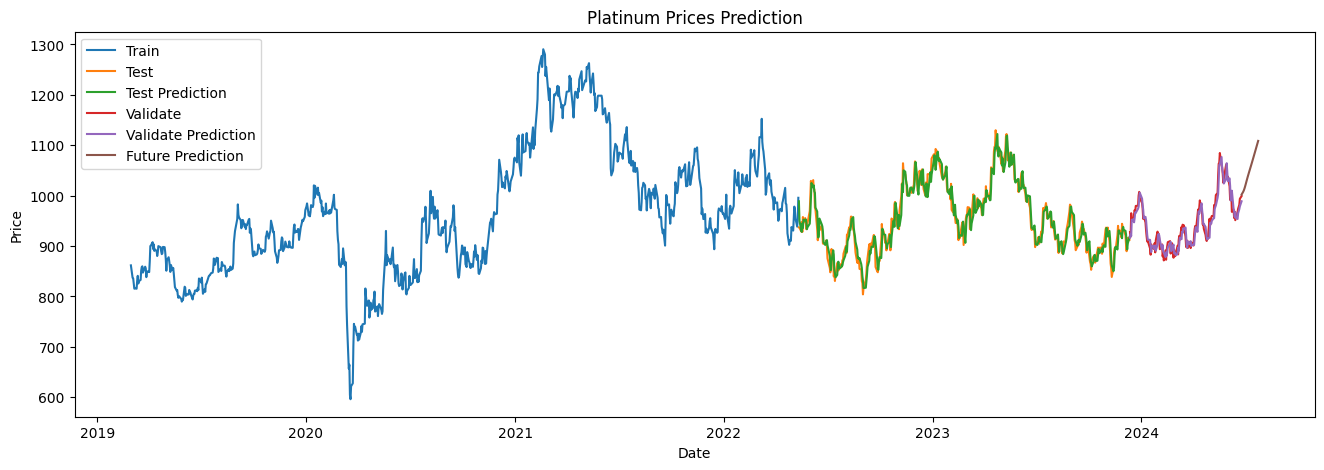

In [34]:
plt.figure(figsize=(16, 5))

# Plot the training data
plt.plot(train_data.index, train_data['Price'], label='Train')  

# Plot the test data and its predictions
plt.plot(test_data.index, test_data['Price'], label='Test') 
plt.plot(test_data.index, y_test_predict, label='Test Prediction')

# Plot the validation data and its predictions
plt.plot(val_data.index, val_data['Price'], label='Validate') 
plt.plot(val_data.index, y_val_predict, label='Validate Prediction')

# Plot the future predictions
plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['price'], label='Future Prediction')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend()
plt.show()


In [35]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  14.574985523319715
MAPE:  1.5294340129199608
RMSE:  18.256058605929077

** Validate **
MAE:  12.46813092912948
MAPE:  1.3123363784332804
RMSE:  15.32806474108093


In [36]:
# Split dataset 5-3-2 

In [37]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [38]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [39]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [40]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\Ken\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.20967, saving model to save_model_5_3_2.keras
12/12 - 3s - 243ms/step - loss: 0.2097
Epoch 2/80

Epoch 2: loss improved from 0.20967 to 0.08413, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0841
Epoch 3/80

Epoch 3: loss improved from 0.08413 to 0.06945, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0694
Epoch 4/80

Epoch 4: loss improved from 0.06945 to 0.05886, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0589
Epoch 5/80

Epoch 5: loss improved from 0.05886 to 0.05557, saving model to save_model_5_3_2.keras
12/12 - 1s - 47ms/step - loss: 0.0556
Epoch 6/80

Epoch 6: loss improved from 0.05557 to 0.05332, saving model to save_model_5_3_2.keras
12/12 - 1s - 47ms/step - loss: 0.0533
Epoch 7/80

Epoch 7: loss improved from 0.05332 to 0.05218, saving model to save_model_5_3_2.keras
12/12 - 1s - 46ms/step - loss: 0.0522
Epoch 8/80

Epoch 8: loss improved from 0.05218 to 0.05

In [41]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [42]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [43]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [44]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.4728660185535636, 0.4578954914986548, 0.42881817232948505, 0.43184111283430493, 0.4423492290082798, 0.40808985162841815, 0.41845396804980206, 0.3965740886195033, 0.4249315847423165, 0.3984453825367922, 0.42507558449490745, 0.4364473477512314, 0.4486828459482035, 0.45170578645302295, 0.4161508505913387, 0.4401900234441083, 0.44637972848974017, 0.40434717593554126, 0.4273787019533708, 0.40996114554570684, 0.40880958681647517, 0.41499929186210704, 0.43846264142111124, 0.41370373338028443, 0.4531452568291374, 0.46667622564963285, 0.4550165507464261, 0.4920109569842248, 0.47430548892967805, 0.4986324855710311, 0.4858212519385927, 0.497049103300625, 0.4643731081911695, 0.4361595239626479, 0.4335684069990027, 0.4531452568291374, 0.4321289366228882, 0.44738737532468, 0.45012231632431776, 0.43184111283430493, 0.44882684570079423, 0.4390384647148764, 0.4696991661544523, 0.4866848990209418, 0.49503380963074517, 0.4787678119523129, 0.5268461576578518, 0.5419605966070524, 0.530732657386

In [45]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.562988817691803], [0.5469538569450378], [0.5281624794006348], [0.5127242207527161], [0.5012677907943726], [0.49288472533226013], [0.4861867129802704], [0.4799436032772064], [0.47337135672569275], [0.4661533832550049], [0.4583243727684021], [0.4501092731952667], [0.44178256392478943], [0.4335760772228241], [0.4256412386894226], [0.41805118322372437], [0.4108225703239441], [0.40394124388694763], [0.39738401770591736], [0.391130656003952], [0.38516852259635925], [0.37949326634407043], [0.3741046190261841], [0.36900436878204346], [0.3641931712627411], [0.35966867208480835], [0.35542580485343933], [0.35145628452301025], [0.3477497696876526], [0.3442939817905426]]


In [46]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[987.00832857]
 [975.86884213]
 [962.81447306]
 [952.08951554]
 [944.1307342 ]
 [938.30701904]
 [933.65391018]
 [929.31682218]
 [924.75108282]
 [919.736757  ]
 [914.2979438 ]
 [908.59091452]
 [902.80635   ]
 [897.10530409]
 [891.59297215]
 [886.32016099]
 [881.29844396]
 [876.51798682]
 [871.96268211]
 [867.61847204]
 [863.47657825]
 [859.53397801]
 [855.79048498]
 [852.24734139]
 [848.90500271]
 [845.76183335]
 [842.81431369]
 [840.05668811]
 [837.48177244]
 [835.08103675]]


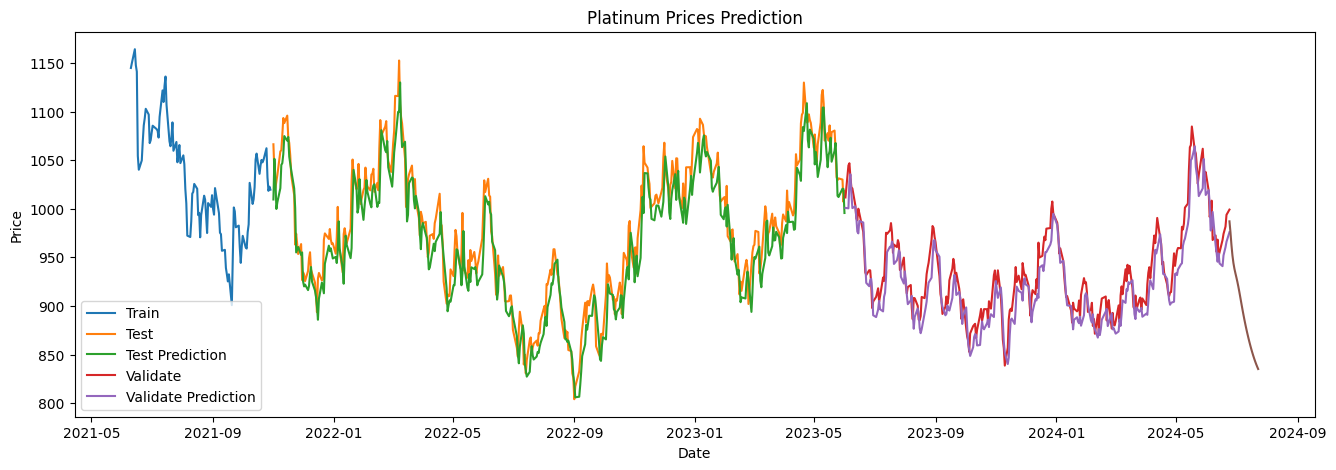

In [47]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [48]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  19.409707380898627
MAPE:  1.9669834776232817
RMSE:  24.189691646526384

** Validate **
MAE:  15.918349875543365
MAPE:  1.69134334281956
RMSE:  19.593049922099834


In [50]:
import pandas as pd


data = {
    "Model": ["LSTM", "LSTM", "LSTM"],
    "Ratio": ["7-2-1", "6-3-1", "5-3-2"],
    "Testing MAE": [15.2338, 14.5750, 19.4097],
    "Testing MAPE": [1.5678, 1.5294, 1.9670],
    "Testing RMSE": [19.0266, 18.2561, 24.1897],
    "Validation MAE": [13.5349, 12.4681, 15.9183],
    "Validation MAPE": [1.4349, 1.3123, 1.6913],
    "Validation RMSE": [16.9139, 15.3281, 19.5930],
}


df = pd.DataFrame(data)


print(df.to_string(index=False))


Model Ratio  Testing MAE  Testing MAPE  Testing RMSE  Validation MAE  Validation MAPE  Validation RMSE
 LSTM 7-2-1      15.2338        1.5678       19.0266         13.5349           1.4349          16.9139
 LSTM 6-3-1      14.5750        1.5294       18.2561         12.4681           1.3123          15.3281
 LSTM 5-3-2      19.4097        1.9670       24.1897         15.9183           1.6913          19.5930
